<a href="https://colab.research.google.com/github/gilbertlim/Ominiscent_CCTV/blob/gilbert/eda_cctv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# 나눔고딕 폰트 설치(런타임 재시작 필요!)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# plt.style.use(['ggplot'])

plt.rc('font', family='NanumBarunGothic') # 나눔고딕 폰트 설정
plt.rcParams['font.size'] = 20

# 1. 연도별 공공기관 CCTV 설치 대수

In [ ]:
!ls -l '/content/drive/My Drive/Project_CCTV/datasets/cctv_2015_2019.xlsx'

-rw------- 1 root root 8937 Apr 20 02:25 '/content/drive/My Drive/Project_CCTV/datasets/cctv_2015_2019.xlsx'


In [ ]:
df = pd.read_excel('/content/drive/My Drive/Project_CCTV/datasets/cctv_2015_2019.xlsx')

In [ ]:
df = df.T

In [ ]:
df.columns=['총 CCTV 설치대수(대)', '전년대비 증가 대수(대)', '전년대비 증감비(%)']

df.drop(df.index[[0]],inplace=True)
df.reset_index(inplace=True, drop=True)
df.index=range(2015, 2020)
df

,총 CCTV 설치대수(대),전년대비 증가 대수(대),전년대비 증감비(%)
2015,"739,232","84,202",12.9
2016,"845,136","105,904",14.3
2017,"954,261","109,125",12.9
2018,"1,032,879","78,618",8.2
2019,"1,148,770","115,891",11.2


In [ ]:
for i in df.columns[:-1]:
    df[i] = df[i].str.replace(',', '').astype('int')

df[df.columns[-1]] = df[df.columns[-1]].astype('float')

In [ ]:
df

,총 CCTV 설치대수(대),전년대비 증가 대수(대),전년대비 증감비(%)
2015,739232,84202,12.9
2016,845136,105904,14.3
2017,954261,109125,12.9
2018,1032879,78618,8.2
2019,1148770,115891,11.2


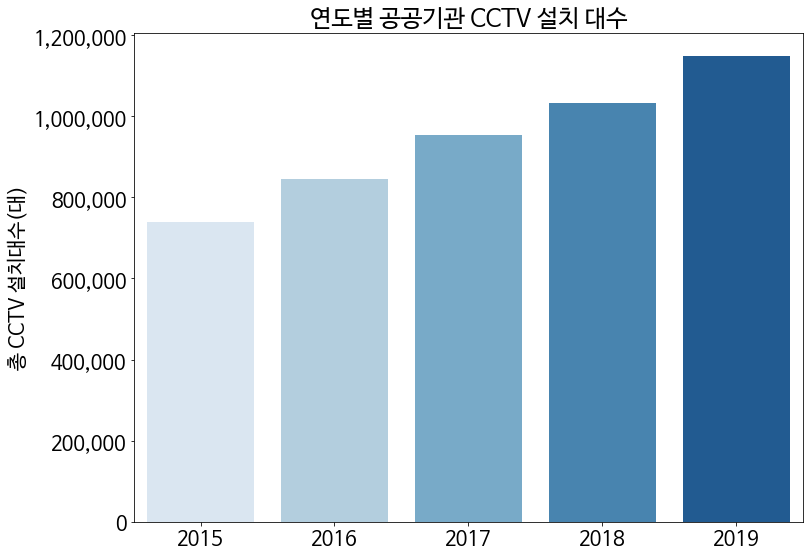

In [ ]:
from matplotlib.ticker import StrMethodFormatter

plt.figure(figsize=(12,9))
sns.barplot(x=df.index, y=df.columns[0], data=df, palette='Blues')
plt.title('연도별 공공기관 CCTV 설치 대수')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:0,.0f}'))
plt.show()

In [ ]:
controller = pd.DataFrame(data=[[1968, 2255, 2674, 2841, 2918]], index=['관제요원 증가 현황'])

controller = controller.T
controller.index=range(2015, 2020)
controller

,관제요원 증가 현황
2015,1968
2016,2255
2017,2674
2018,2841
2019,2918


In [ ]:
df = pd.concat([df,controller], axis=1)

df

,총 CCTV 설치대수(대),전년대비 증가 대수(대),전년대비 증감비(%),관제요원 증가 현황
2015,739232,84202,12.9,1968
2016,845136,105904,14.3,2255
2017,954261,109125,12.9,2674
2018,1032879,78618,8.2,2841
2019,1148770,115891,11.2,2918


In [ ]:
df['1명당 관제 대수'] = df['총 CCTV 설치대수(대)'] / df['관제요원 증가 현황']
df['1명당 관제 대수'] = df['1명당 관제 대수'].astype(int)
df.index=range(2015, 2020)
df

,총 CCTV 설치대수(대),전년대비 증가 대수(대),전년대비 증감비(%),관제요원 증가 현황,1명당 관제 대수
2015,739232,84202,12.9,1968,375
2016,845136,105904,14.3,2255,374
2017,954261,109125,12.9,2674,356
2018,1032879,78618,8.2,2841,363
2019,1148770,115891,11.2,2918,393


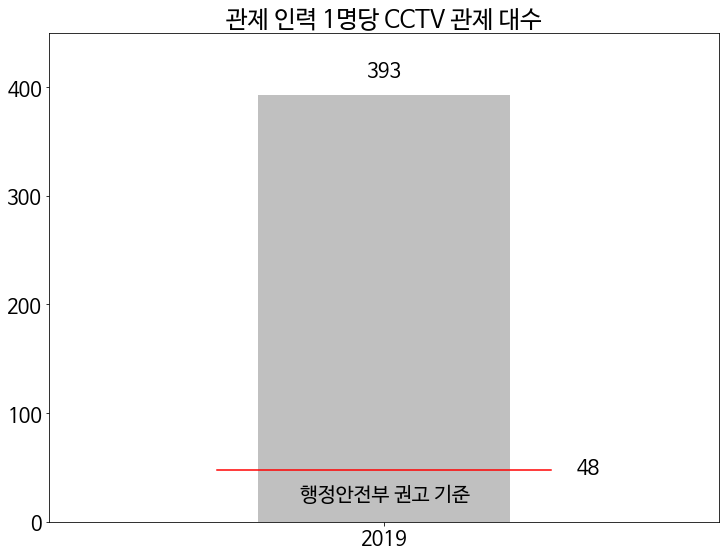

In [ ]:
plt.figure(figsize=(12,9))

df.iloc[-1:,-1].plot.bar(color='silver', width=3)
plt.xlim([-4, 4])
plt.ylim(0, 450)
plt.title('관제 인력 1명당 CCTV 관제 대수')
plt.xticks(rotation=360)
plt.yticks(range(0, 500, 100))

plt.text(-0.2, 410, r'393')

plt.plot([-2,2], [48,48], 'r')
plt.text(-1, 20, r'행정안전부 권고 기준')
plt.text(2.3, 45, r'48')
plt.show()

In [ ]:
data={'3조2교대':[3.75], '4조2교대':[31.25], '4조3교대':[51.9], '4조4교대':[3.12], '5조3교대':[1.88], '기타':[8.1]}

working_form = pd.DataFrame(data)
working_form = working_form.sort_values(by=0, axis=1, ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


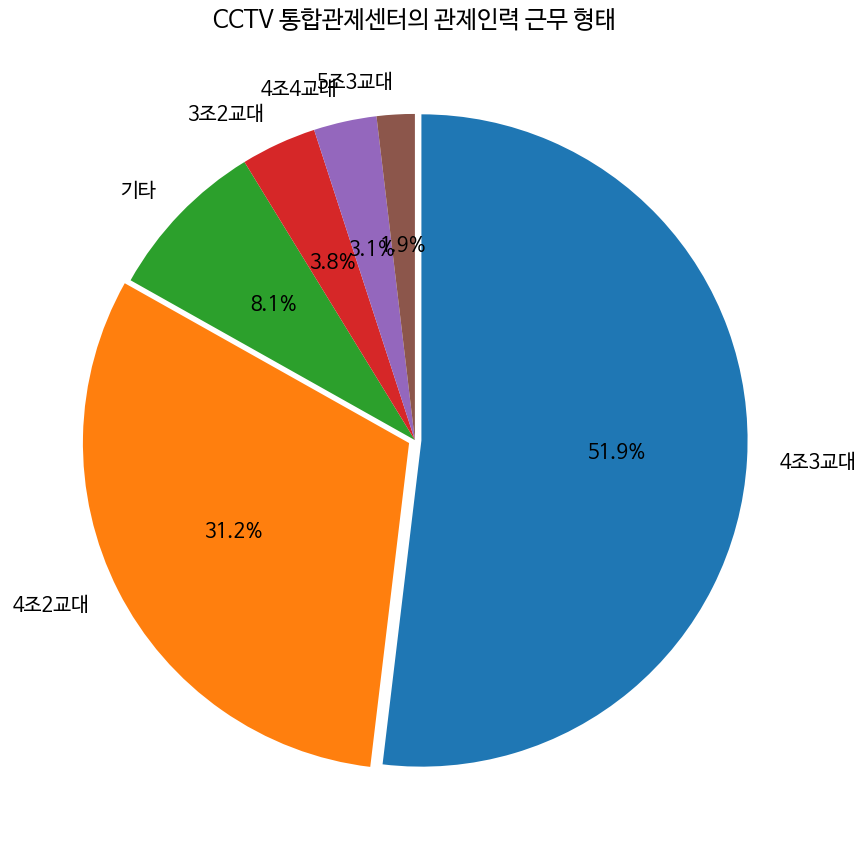

In [ ]:
plt.figure(figsize=(15,15))

explode = [0.02, 0.02, 0, 0, 0, 0]

pie = plt.pie(x=working_form, labels=working_form.columns, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode)

plt.title('CCTV 통합관제센터의 관제인력 근무 형태')

plt.show()

In [ ]:
pie[0]

# 2. CCTV 관련 검색어 트렌드

In [ ]:
!ls -l '/content/drive/My Drive/Project_CCTV/datasets/cctv_naver.xlsx'

-rw------- 1 root root 37979 Apr 20 05:56 '/content/drive/My Drive/Project_CCTV/datasets/cctv_naver.xlsx'


In [ ]:
trend = pd.read_excel('/content/drive/My Drive/Project_CCTV/datasets/cctv_naver.xlsx')

In [ ]:
trend

,url,http://datalab.naver.com/keyword/trendResult.naver?hashKey=N_b1ac1065fd268a5859fa6eb5b4c09162
0,주제,통검
1,범위,합계
2,기간,일간 : 2016-04-19 ~ 2021-04-19
3,성별,"전체(여성,남성)"
4,연령대,전체
...,...,...
1828,2021-04-15,47.20092
1829,2021-04-16,43.68289
1830,2021-04-17,32.3332
1831,2021-04-18,36.55099


In [ ]:
trend.columns=['Date', 'Count']
trend.drop(index=range(6), inplace=True)
trend.reset_index(drop=True)

,Date,Count
0,2016-04-19,37.34662
1,2016-04-20,38.99539
2,2016-04-21,41.52607
3,2016-04-22,39.42676
4,2016-04-23,27.58819
...,...,...
1822,2021-04-15,47.20092
1823,2021-04-16,43.68289
1824,2021-04-17,32.3332
1825,2021-04-18,36.55099


In [ ]:
trend.drop(trend[trend['Date'] < '2018-01-01'].index, axis=0, inplace=True)
trend.reset_index(drop=True, inplace=True)
trend

,Date,Count
0,2018-01-01,19.96740
1,2018-01-02,28.59470
2,2018-01-03,29.71625
3,2018-01-04,27.81825
4,2018-01-05,25.24923
...,...,...
1200,2021-04-15,47.20092
1201,2021-04-16,43.68289
1202,2021-04-17,32.33320
1203,2021-04-18,36.55099


In [ ]:
trend[trend.columns[0]] = trend[trend.columns[0]].astype('datetime64')
trend[trend.columns[1]] = trend[trend.columns[1]].astype('float')

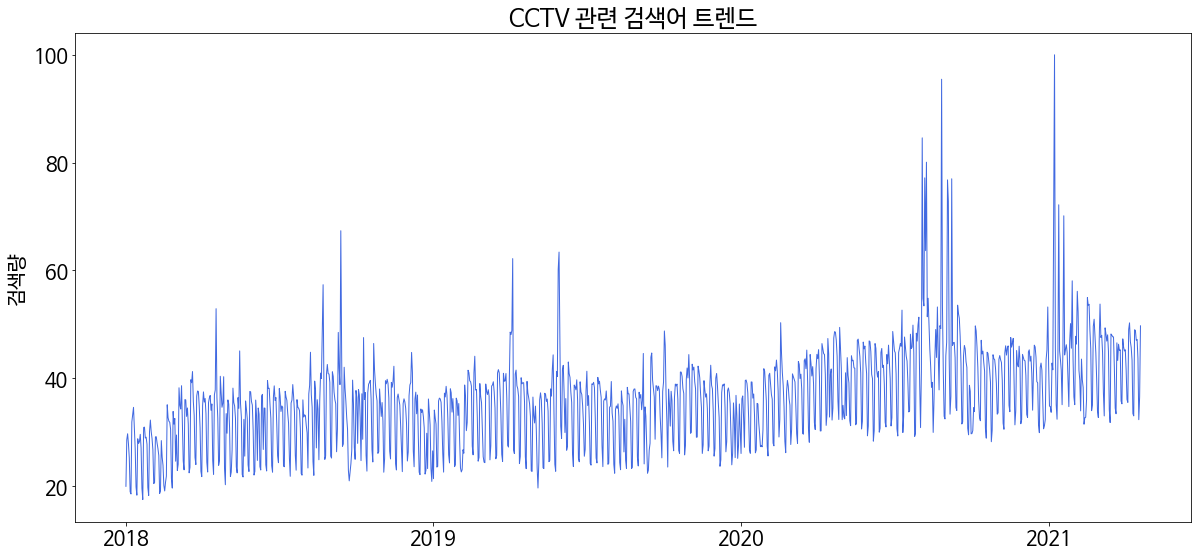

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(20,9))
sns.lineplot(x=trend['Date'], y=trend['Count'], data=trend, linewidth=1, color='royalblue')

plt.title('CCTV 관련 검색어 트렌드')
plt.ylabel('검색량')

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

loc = mdates.YearLocator()
ax.xaxis.set_major_locator(loc)

plt.xlabel('')
plt.show()

# 3. 범죄별

In [ ]:
!ls -l '/content/drive/My Drive/Project_CCTV/datasets/2017_to_2019_crime_data_in_korea.xlsx'

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel('/content/drive/My Drive/Project_CCTV/datasets/2017_to_2019_crime_data_in_korea.xlsx')

In [ ]:
data.info()

In [ ]:
data.head()

In [ ]:
data = data[['죄종별', '2017', '2018', '2019']]
data.head(10)

In [ ]:
df = data.drop(0)
df.reset_index(drop=True, inplace=True)
df

In [ ]:
df.dtypes

In [ ]:
df.iloc[:,1:] = df.iloc[:,1:].replace('-', '0')

In [ ]:
df = df.astype({'2017':'int', '2018':'int', '2019':'int'})

df.info()

In [ ]:
df['평균'] = df.iloc[:,1:].mean(axis=1).astype('int')

In [ ]:
df = df.sort_values(by='평균', ascending=False)
df.reset_index(drop=True, inplace=True)
df

In [ ]:
df[df['죄종별'].str.contains('절도')]

In [ ]:
df[df['죄종별'].str.contains('폭행')]

In [ ]:
df[df['죄종별'].str.contains('학대')]

In [ ]:
df[df['죄종별'].str.contains('방화')]

In [ ]:
df

NameError: ignored